# Churn Classification

## Setup

In [1]:
# Data
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Others
import math

## Business Understanding

Business is facing increasing churn rates over the last years, the business goal of this project is to understand why clients are leaving and come up with a strategy to reduce the churn.

Data goal is to create a model able to classify if a client is possible churn or not

## Data Understanding

We have the register of over 10k clients, classified as churn or not churn. The data is available through a CSV file with the following information

<table style='margin-left: 0; border: 1px solid'>
    <tr>
        <th>Variable Name</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>CLIENTNUM</td>
        <td>Customer number. Unique identifier of the account holder.</td>
    </tr>
    <tr>
        <td>Attrition_Flag</td>
        <td>Internal event variable (customer activity) - if the account is closed, then 1, otherwise 0.</td>
    </tr>
    <tr>
        <td>Customer_Age</td>
        <td>Demographic variable - Customer's age in years.</td>
    </tr>
    <tr>
        <td>Gender</td>
        <td>Demographic variable - M=Male, F=Female.</td>
    </tr>
    <tr>
        <td>Dependent_count</td>
        <td>Demographic variable - Number of dependents.</td>
    </tr>
    <tr>
        <td>Education_Level</td>
        <td>Demographic variable - Educational qualification of the account holder (e.g., high school, college degree, etc.).</td>
    </tr>
    <tr>
        <td>Marital_Status</td>
        <td>Demographic variable - Married, Single, Divorced, Unknown.</td>
    </tr>
    <tr>
        <td>Income_Category</td>
        <td>Demographic variable - Annual income category of the account holder (< $40,000, $40,000 - $60,000, $60,000 - $80,000, $80,000 - $120,000, > $120,000, Unknown).</td>
    </tr>
    <tr>
        <td>Card_Category</td>
        <td>Product variable - Type of card (Blue, Silver, Gold, Platinum).</td>
    </tr>
    <tr>
        <td>Months_on_book</td>
        <td>Relationship period with the bank.</td>
    </tr>
    <tr>
        <td>Total_Relationship_Count</td>
        <td>Total number of products held by the customer.</td>
    </tr>
    <tr>
        <td>Months_Inactive_12_mon</td>
        <td>Number of inactive months in the last 12 months.</td>
    </tr>
    <tr>
        <td>Contacts_Count_12_mon</td>
        <td>Number of contacts in the last 12 months.</td>
    </tr>
    <tr>
        <td>Credit_Limit</td>
        <td>Credit limit on the credit card.</td>
    </tr>
    <tr>
        <td>Total_Revolving_Bal</td>
        <td>Total revolving balance on the credit card.</td>
    </tr>
    <tr>
        <td>Avg_Open_To_Buy</td>
        <td>Credit line open for purchase (average over the last 12 months).</td>
    </tr>
    <tr>
        <td>Total_Amt_Chng_Q4_Q1</td>
        <td>Change in transaction amount (fourth quarter over the first quarter).</td>
    </tr>
    <tr>
        <td>Total_Trans_Amt</td>
        <td>Total transaction amount (last 12 months).</td>
    </tr>
    <tr>
        <td>Total_Trans_Ct</td>
        <td>Total transaction count (last 12 months).</td>
    </tr>
    <tr>
        <td>Total_Ct_Chng_Q4_Q1</td>
        <td>Change in transaction count (fourth quarter over the first quarter).</td>
    </tr>
    <tr>
        <td>Avg_Utilization_Ratio</td>
        <td>Average credit card utilization rate.</td>
    </tr>
    <tr>
        <td>Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1</td>
        <td>Naive Bayes.</td>
    </tr>
    <tr>
        <td>Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2</td>
        <td>Naive Bayes.</td>
    </tr>
</table>

Last two variables refer to previous predictions using Naive Bayes classifiers to try to predict the churn of a client.


In [2]:
df_original = pd.read_csv('../data/churn-dataset.csv')
df_original.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


To accurately predict customer churn, this analysis excludes features derived from previous Naive Bayes classifications. This is because predicting future churn requires insights into current customer behavior, not past predictions, which would not be available for new observations. Furthermore, the 'CLIENTNUM' column will be dropped from the analysis. As a unique identifier for each observation, it does not provide any relevant information for predicting customer churn.

In [3]:
df = df_original.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
    'CLIENTNUM'
])

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
# Get initial information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [5]:
# Check for any missing value
df.isna().any()

Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [6]:
# Check for duplicates
print(f'Duplicated values: {df.duplicated().sum()}')

Duplicated values: 0


In [7]:
# Get categorical and numeric columns in different lists
# It will make it easier to analyze each group
categorical_columns = list(df.select_dtypes('object').columns)
numeric_columns = list(df.select_dtypes('number').columns)

In [8]:
# Convert `object` into `category` variables
df[categorical_columns] = df[categorical_columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [9]:
# Get summary of numeric columns
df[numeric_columns].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [21]:
# Plot counts for every categorical column
cols = 3
rows = math.ceil(len(categorical_columns) / cols) 

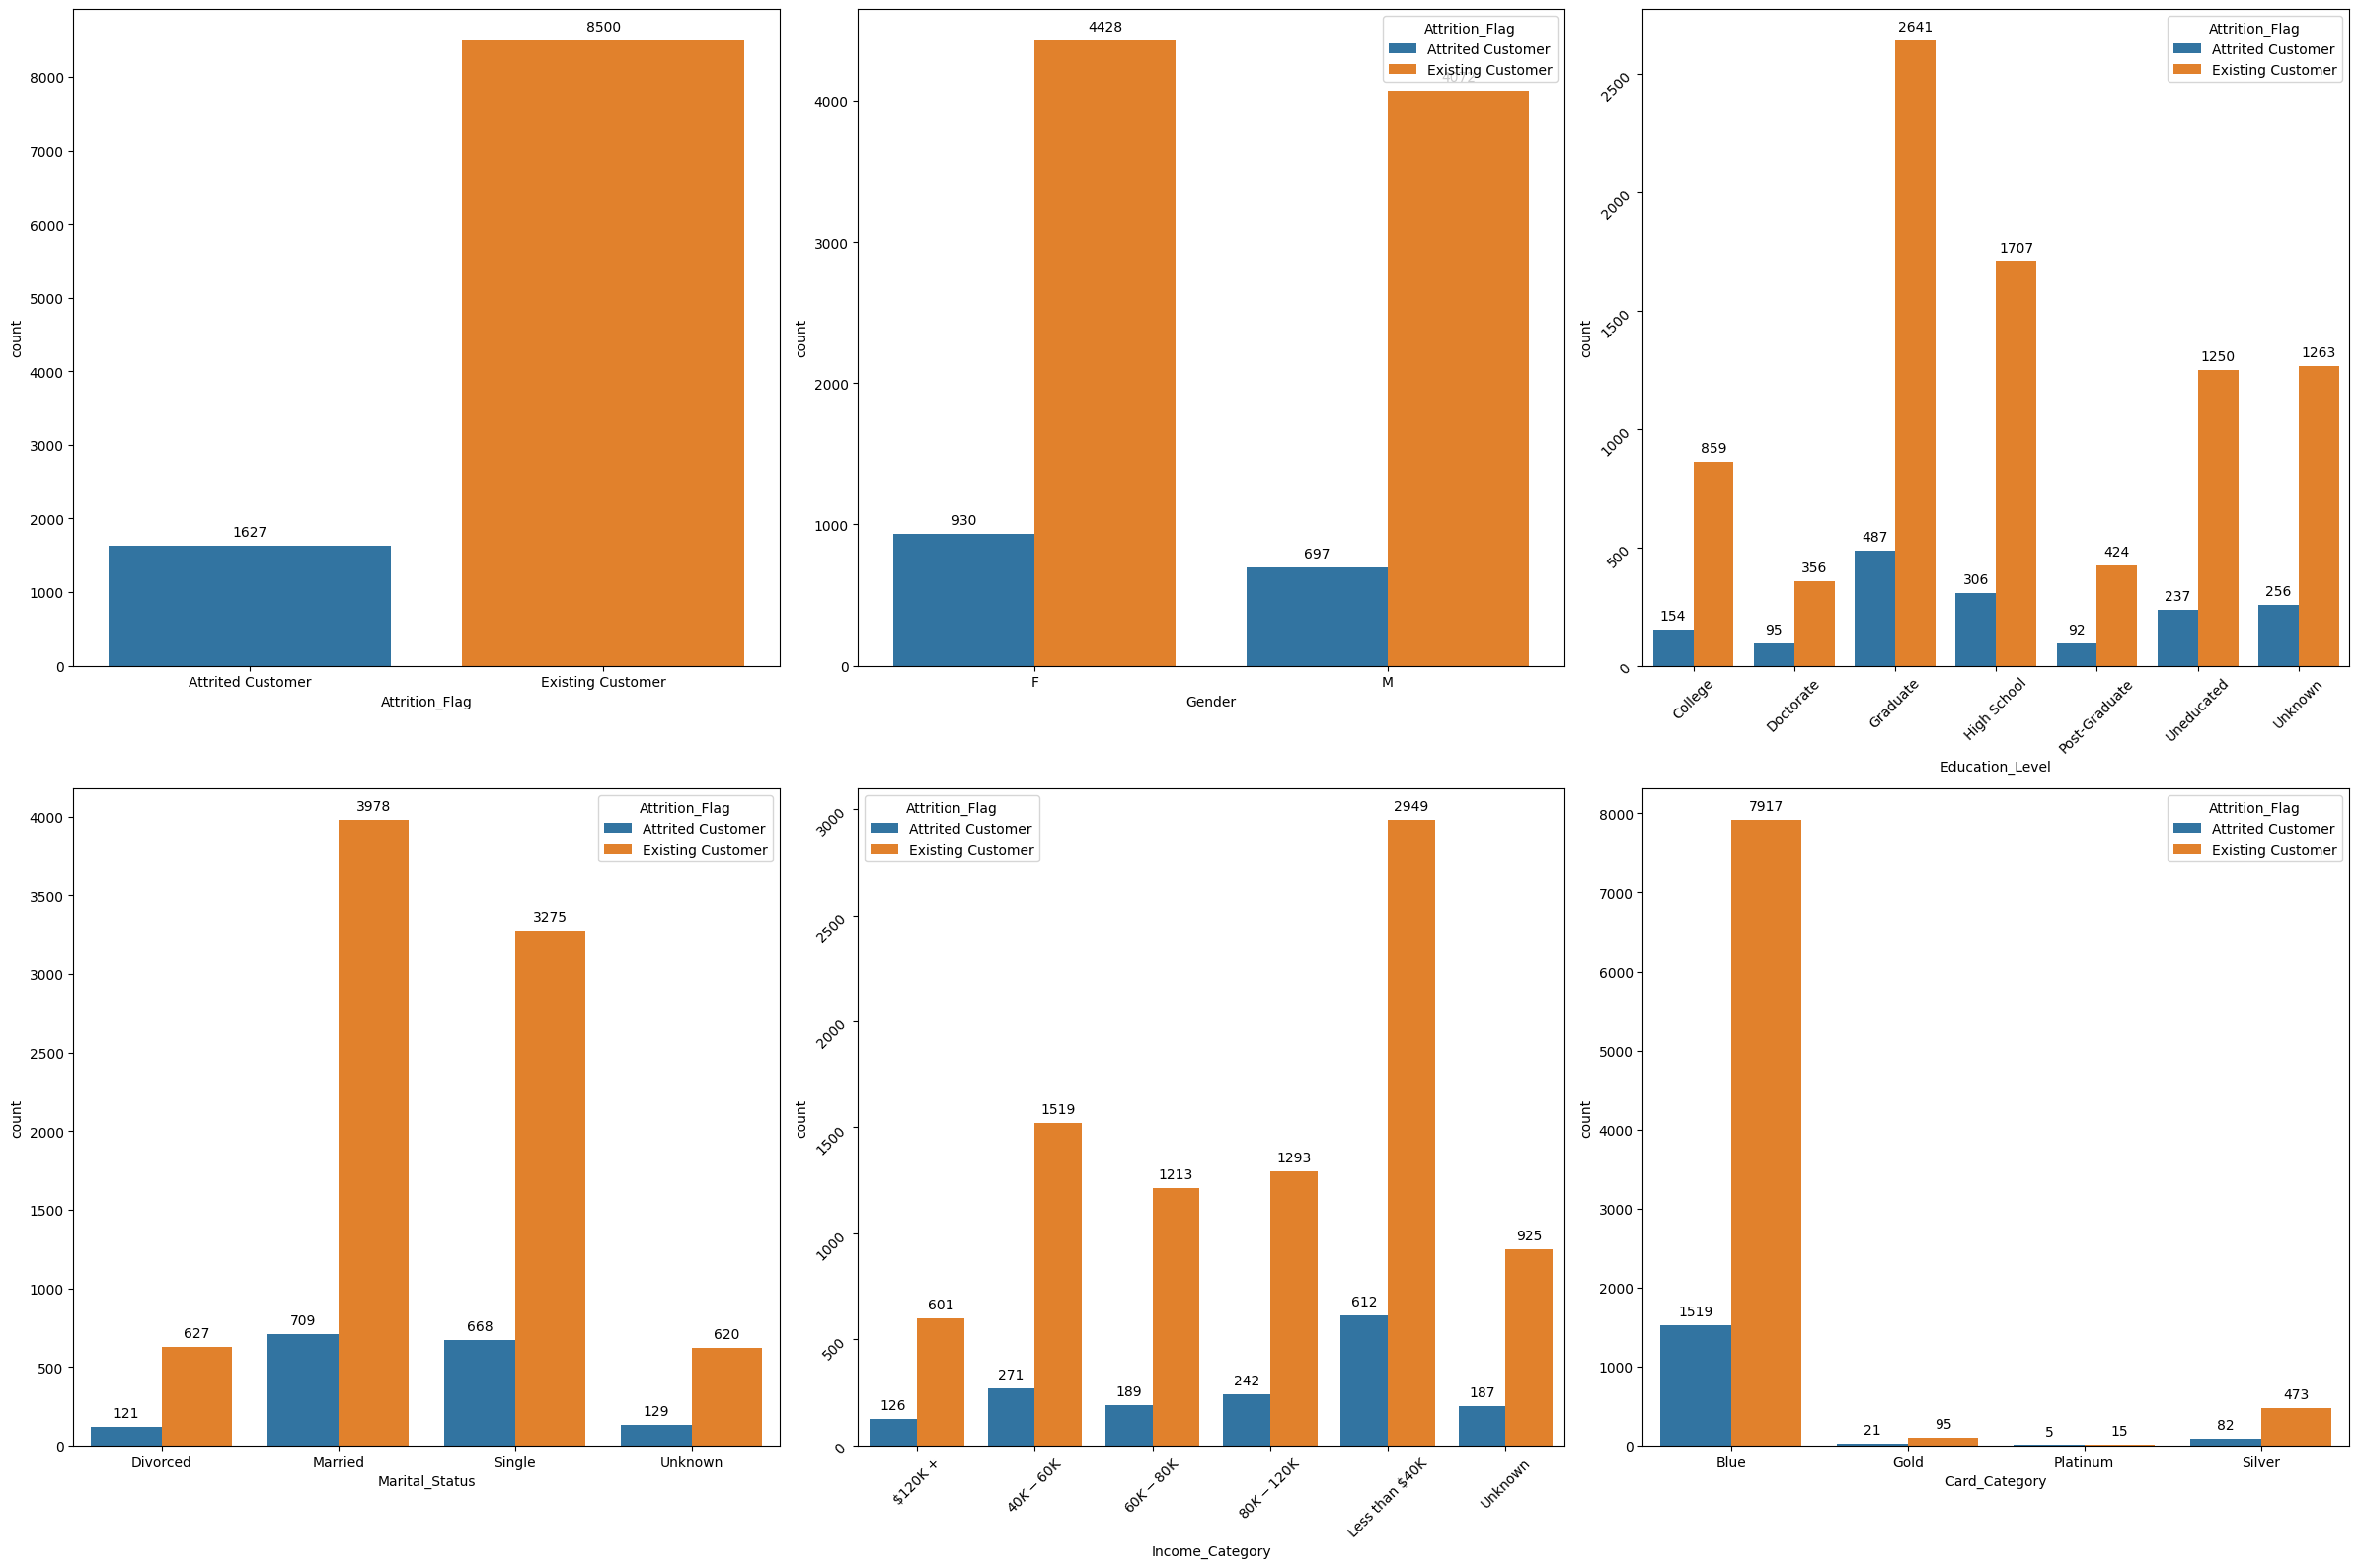

In [22]:
fig, axs = plt.subplots(rows, cols, figsize=(24, 8*rows))

for i, c in enumerate(categorical_columns):
    ax = sns.countplot(df, x=c, orient='v', ax=axs[i//cols][i%cols], hue='Attrition_Flag')
    ax.bar_label(ax.containers[0], padding=5)
    ax.bar_label(ax.containers[1], padding=5)
    if (len(df[c].value_counts()) > 4):
        ax.tick_params(labelrotation=45)
plt.tight_layout()

As we can observe we have unbalanced classes of clients, with much more clients in the category 'Existing Customer' than 'Attrited Customer', this might be important when training our model as we might need to perform some kind of oversampling. 

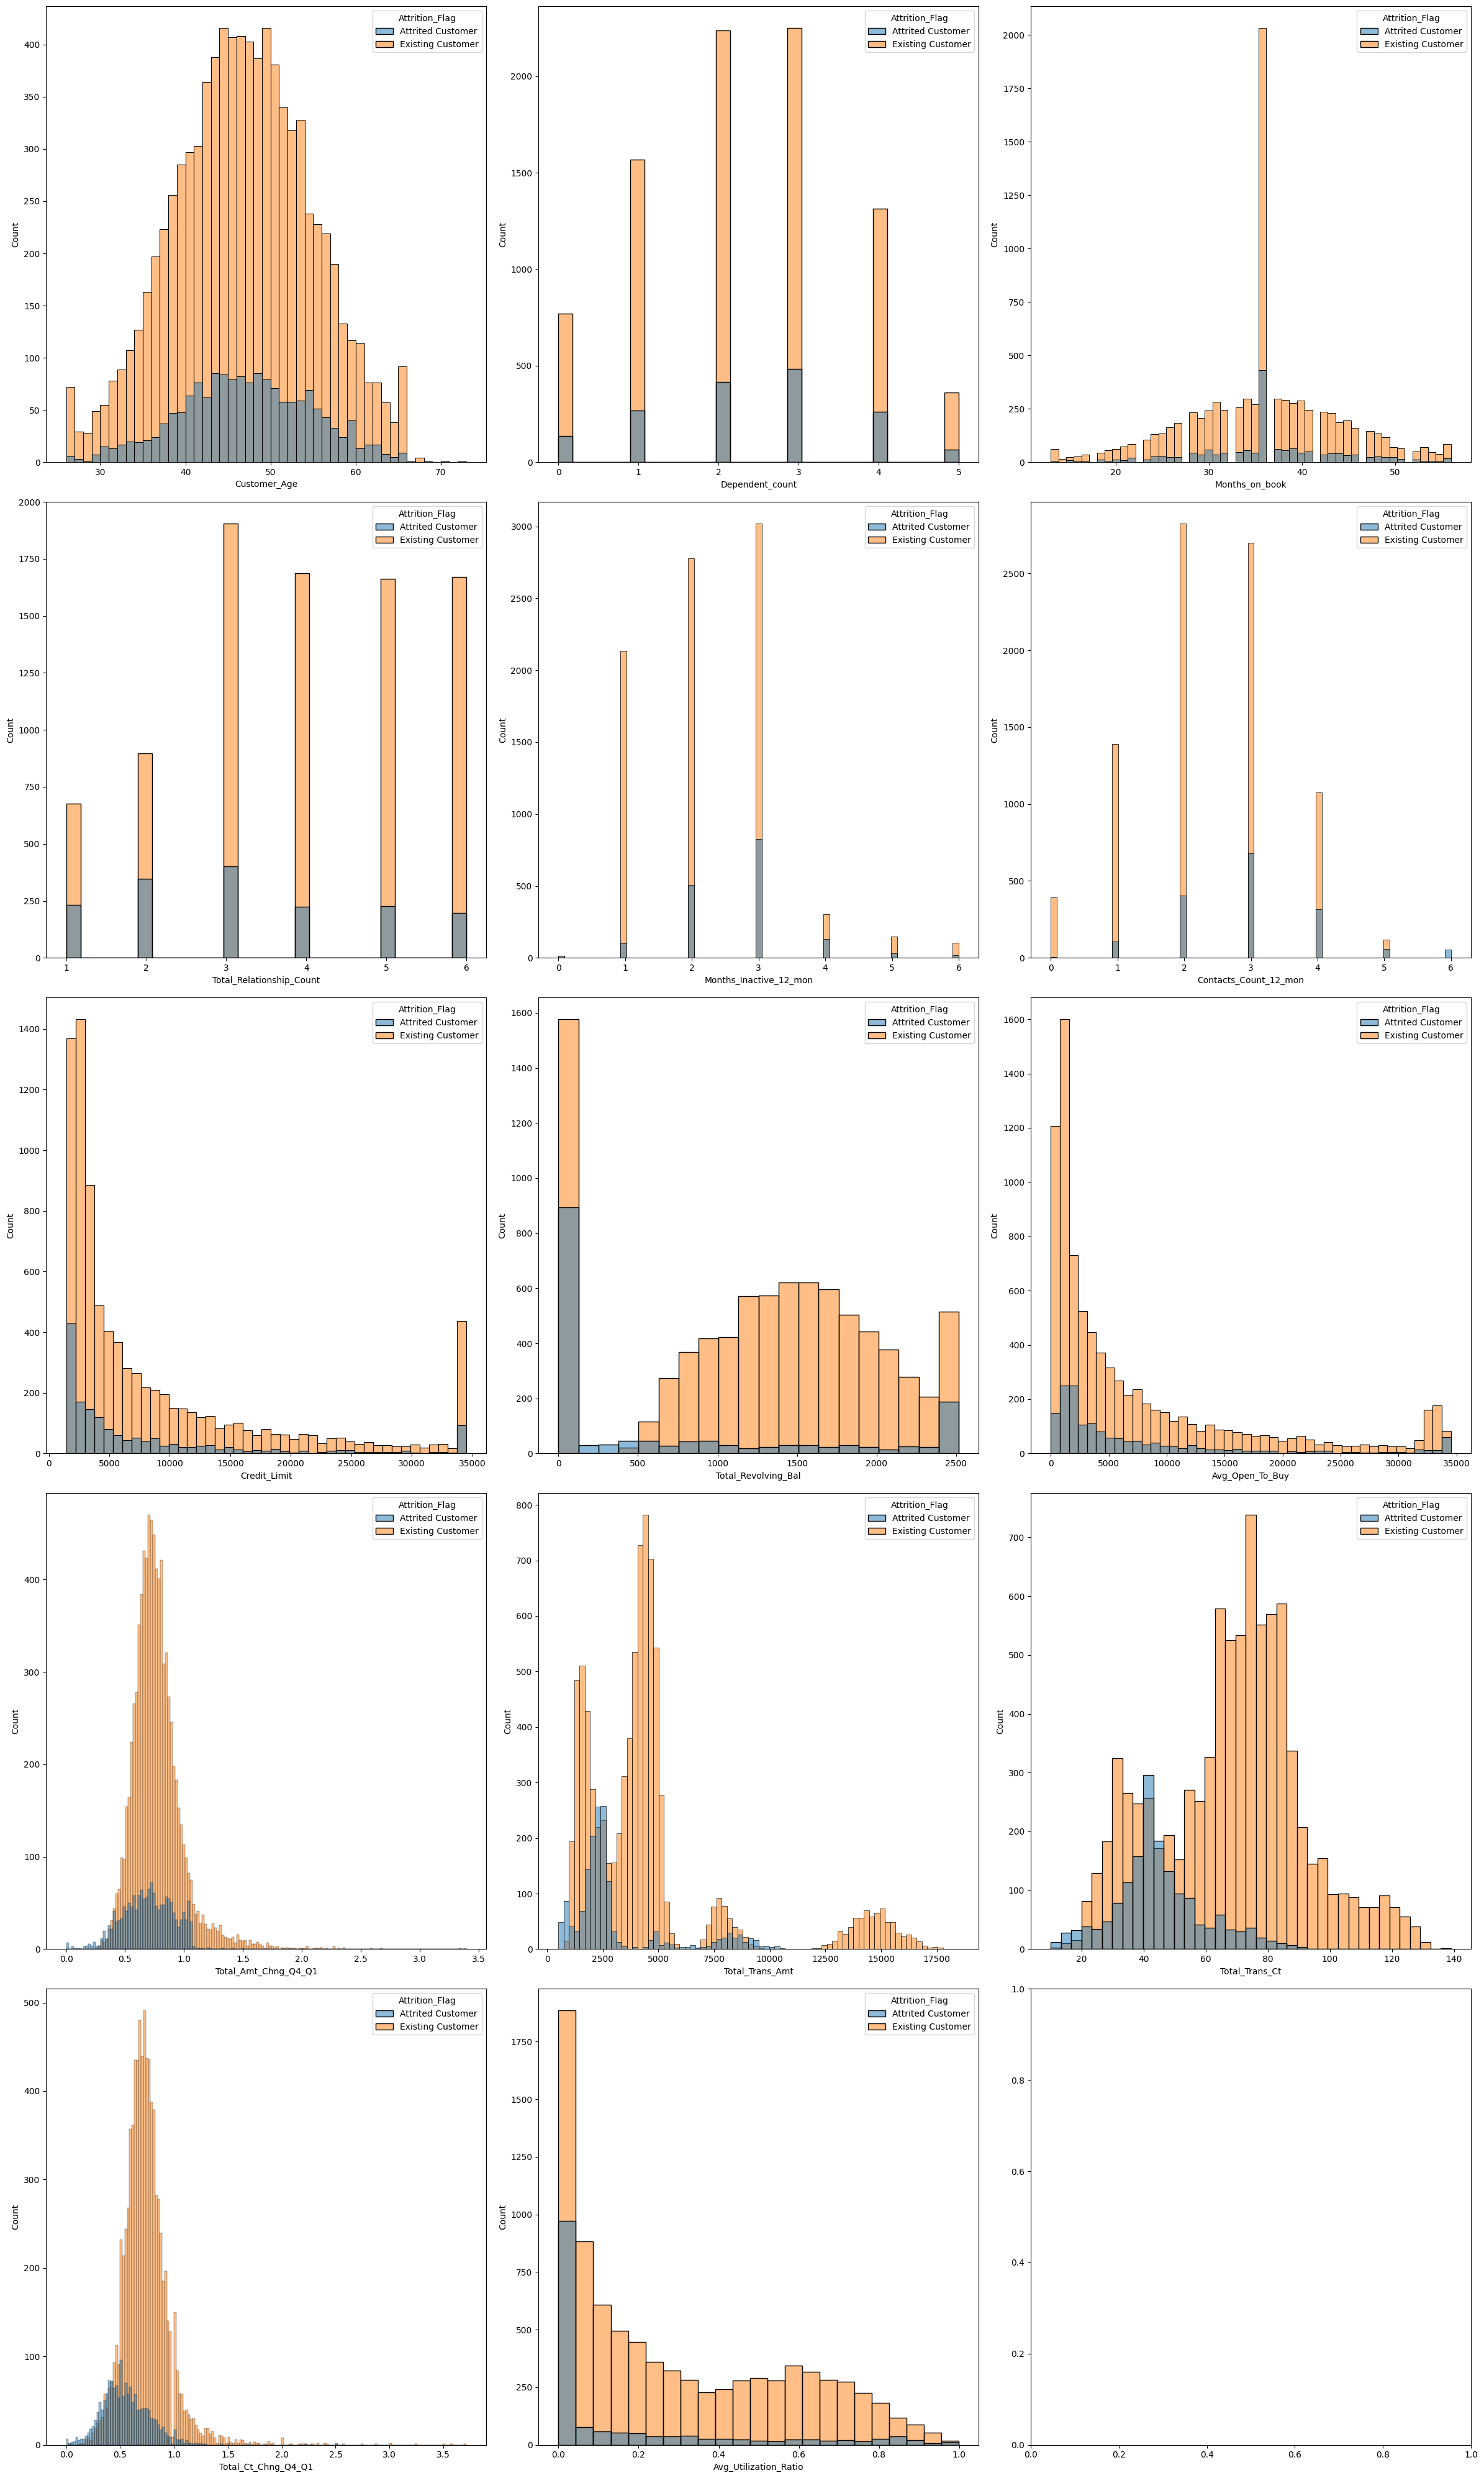

In [25]:
# Plot histogram for every categorical column
cols = 3
rows = math.ceil(len(numeric_columns) / cols) 

fig, axs = plt.subplots(rows, cols, figsize=(24, 8*rows))

for i, c in enumerate(numeric_columns):
    ax = sns.histplot(df, x=c, ax=axs[i//cols][i%cols], hue='Attrition_Flag')
plt.tight_layout()

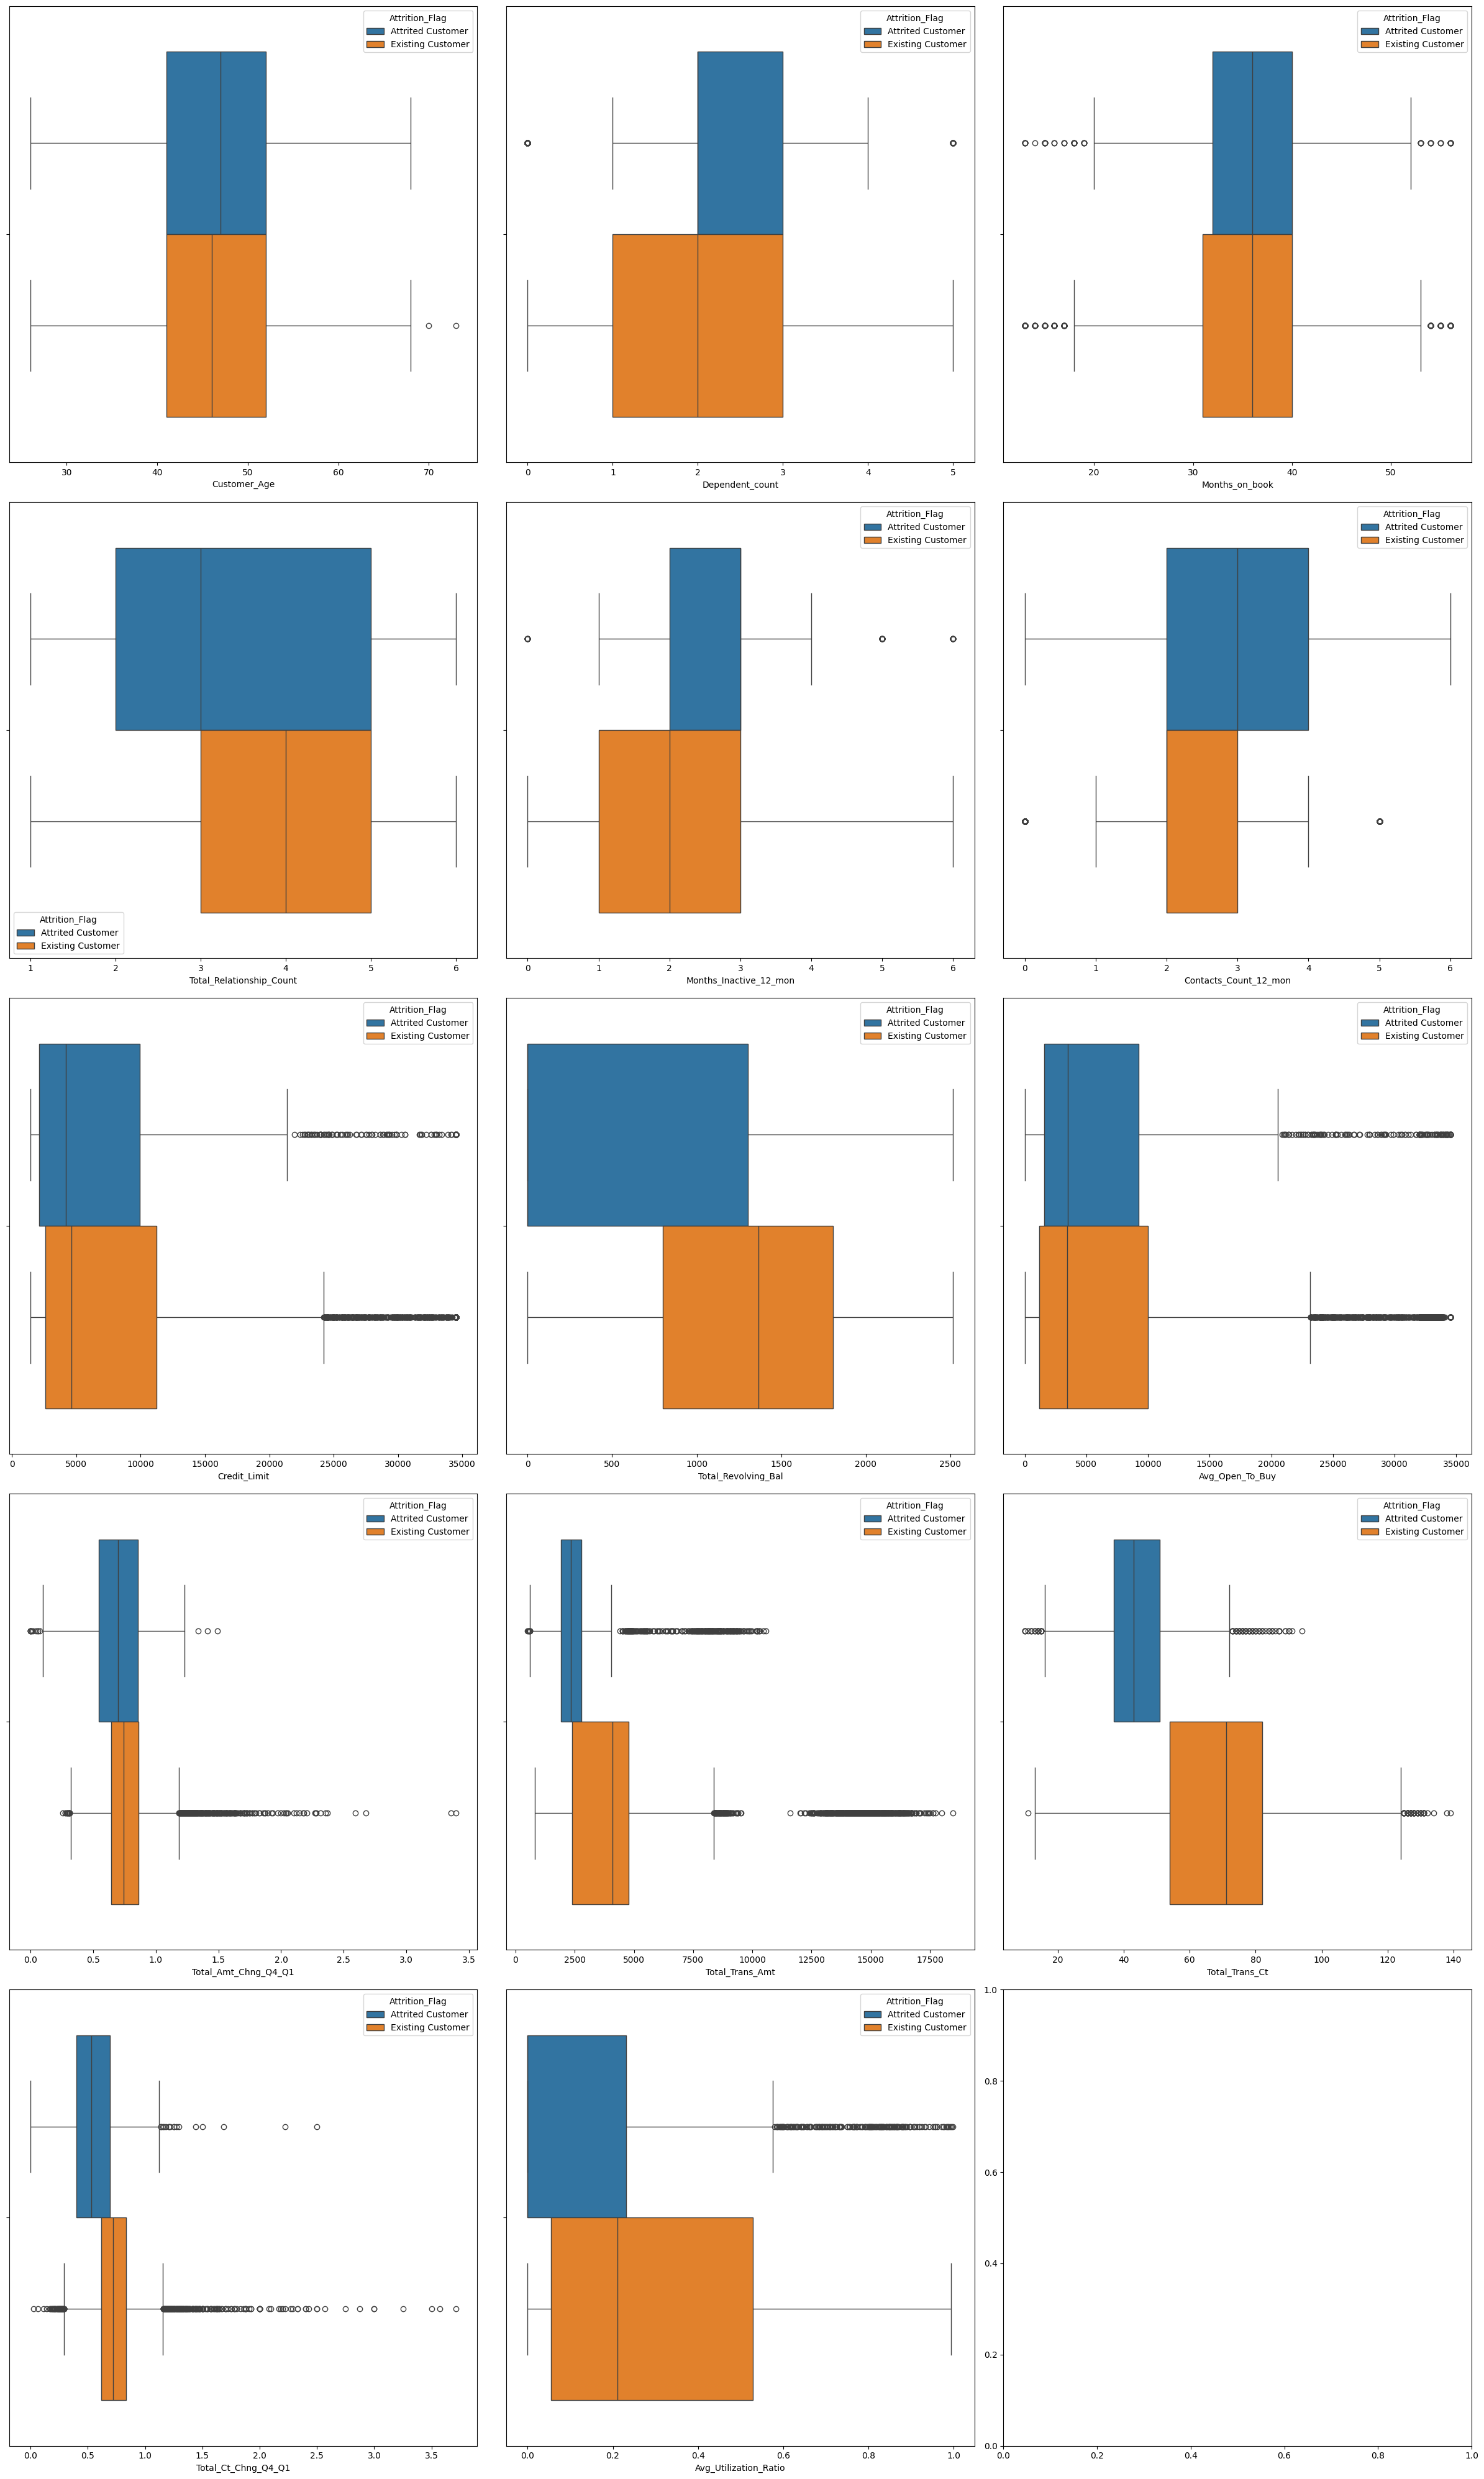

In [26]:
# Plot boxplot  for every categorical column
cols = 3
rows = math.ceil(len(numeric_columns) / cols) 

fig, axs = plt.subplots(rows, cols, figsize=(24, 8*rows))

for i, c in enumerate(numeric_columns):
    ax = sns.boxplot(df, x=c, ax=axs[i//cols][i%cols], hue='Attrition_Flag')
plt.tight_layout()